In [1]:
from test import test_fusion
from utils import CustomVisionDataset_train
from model_visdrone8 import Fusionmodel
from loss_fn2 import CustomLoss
import torch
from PIL import Image
import torchvision.transforms as transforms
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def loader_function(dataset, batchsize=8, num_samples=0):
    Data_set = dataset
    
    if num_samples != 0:
        random_sampler = torch.utils.data.RandomSampler(Data_set, num_samples=num_samples)
        Loader = torch.utils.data.DataLoader(Data_set, batch_size=batchsize, sampler=random_sampler)
    else:
        Loader = torch.utils.data.DataLoader(Data_set, batch_size=batchsize, shuffle=False)
    return Loader

In [31]:
device = 'cpu'

model = Fusionmodel().to(device)
loss_function = CustomLoss().to(device)

model_path = "Trained/CBD8/trained_model/model_best_val_20230919_152654_34"

model.load_state_dict(torch.load(model_path,map_location=device))

# Data_set = CustomVisionDataset_train('Original_test_image', 'VIS', 'IR')
Data_set = CustomVisionDataset_train('/storage/locnx/CBD/train/', 'VIS', 'IR')
test_loader1 = loader_function(Data_set, batchsize=1, num_samples=20)
# test_loader1 = loader_function('Original_test_image', 'VIS', 'IR')


model.eval()

print('done')

done


In [32]:
# vis_image, ir_image, vis_name, ir_name = Data_set[0]
# vis_image2 = vis_image.permute(2, 1, 0)
# plt.imshow(vis_image2)

In [33]:
# ir_image2 = ir_image.permute(2, 1, 0)
# plt.imshow(ir_image2)

In [34]:
# with torch.no_grad():
#     for i, tdata in enumerate(test_loader1):
#         if i < 100:
#             vis_image, ir_image, vis_name, ir_name = tdata
#             print(vis_name, ir_name)


In [35]:
with torch.no_grad():
    for i, tdata in enumerate(test_loader1):
        if i ==1:
            vis_image, ir_image, vis_name, ir_name = tdata
            vis_image = vis_image.to(device)
            ir_image = ir_image.to(device)

            output_encodervis1 = model.encodervis1(vis_image)
            output_encodervis2 = model.encodervis2(vis_image)
            output_encoderir1 = model.encodervis1(ir_image)
            output_encoderir2 = model.encodervis2(ir_image)
            out = model.fusion(output_encodervis1, output_encodervis2,output_encoderir1, output_encoderir2 )
            output = model(vis_image, ir_image)
            
            print(vis_image.size())
            print(output_encodervis1.size())
            print(output.size())

            output_encodervis1 = output_encodervis1.squeeze()
            output_encodervis2 = output_encodervis2.squeeze()
            output_encoderir1 = output_encoderir1.squeeze()
            output_encoderir2 = output_encoderir2.squeeze()
            out = out.squeeze()
            output = output.squeeze()
            vis_image = vis_image.squeeze()
            ir_image = ir_image.squeeze()

torch.Size([1, 3, 256, 256])
torch.Size([1, 32, 256, 256])
torch.Size([1, 3, 256, 256])


In [36]:
print(vis_name, ir_name)

('VD_12037.jpg',) ('VD_12037.jpg',)


Saved Name for sample:
('VD_01846.jpg',) ('VD_01846.jpg',)
('VD_11557.jpg',) ('VD_11557.jpg',)
('VD_09929.jpg',) ('VD_09929.jpg',)
('VD_01255.jpg',) ('VD_01255.jpg',)
('VD_03037.jpg',) ('VD_03037.jpg',) VIS image totally black
('FLIR_04662.jpg',) ('FLIR_04662.jpg',) mis aligned input




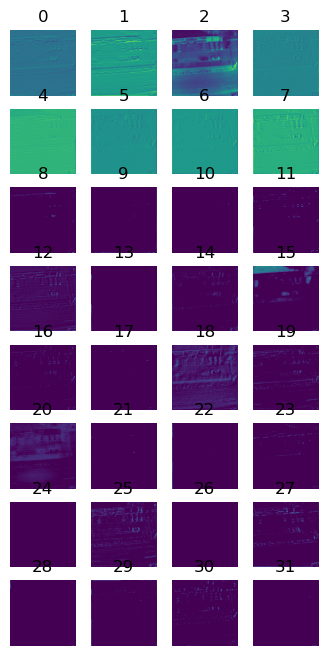

In [37]:
fig = plt.figure(figsize=(4, 8))
for i in range(32):
    fig.add_subplot(8, 4, i + 1)
    plt.axis('off')
    plt.title(i)
    plt.imshow(output_encodervis1[i]) #cmap=plt.cm.binary

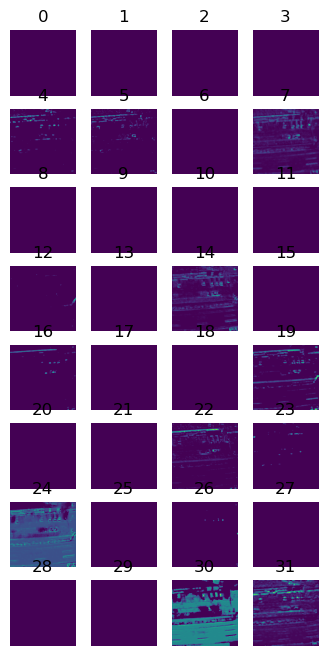

In [38]:
# fig = plt.figure(figsize=(20, 80))
fig = plt.figure(figsize=(4, 8))
for i in range(32):
    fig.add_subplot(8, 4, i + 1)
    plt.axis('off')
    plt.title(i)
    plt.imshow(output_encodervis2[i])

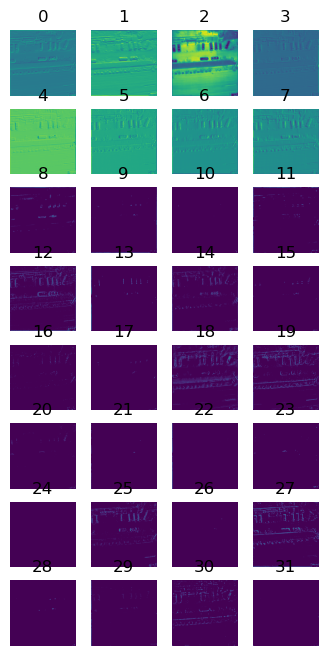

In [39]:
# fig = plt.figure(figsize=(20, 80))
fig = plt.figure(figsize=(4, 8))
for i in range(32):
    fig.add_subplot(8, 4, i + 1)
    plt.axis('off')
    plt.title(i)
    plt.imshow(output_encoderir1[i])

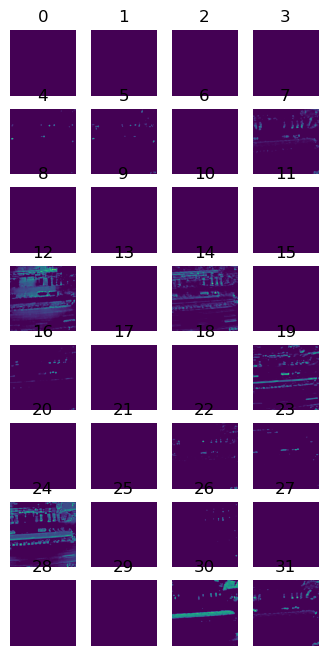

In [40]:
# fig = plt.figure(figsize=(20, 80))
fig = plt.figure(figsize=(4, 8))
for i in range(32):
    fig.add_subplot(8, 4, i + 1)
    plt.axis('off')
    plt.title(i)
    plt.imshow(output_encoderir2[i])

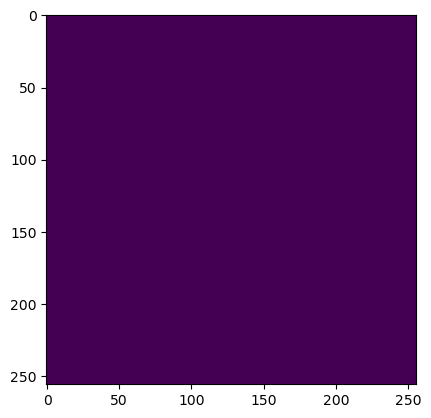

In [41]:
 plt.imshow(output_encoderir2[20])

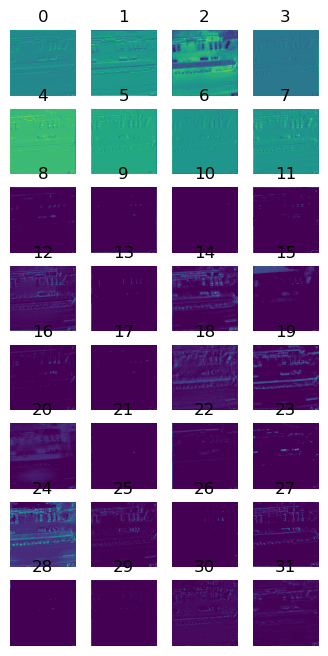

In [42]:
# fig = plt.figure(figsize=(20, 80))
fig = plt.figure(figsize=(4, 8))
for i in range(32):
    fig.add_subplot(8, 4, i + 1)
    plt.axis('off')
    plt.title(i)
    plt.imshow(out[i])

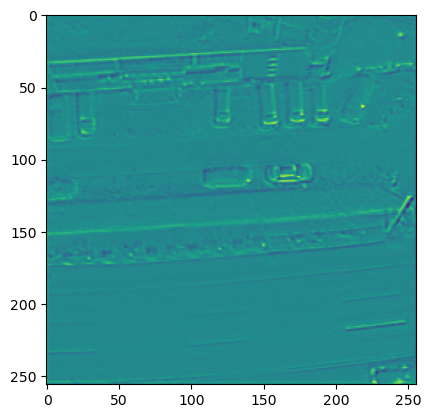

In [43]:
plt.imshow(out[0])

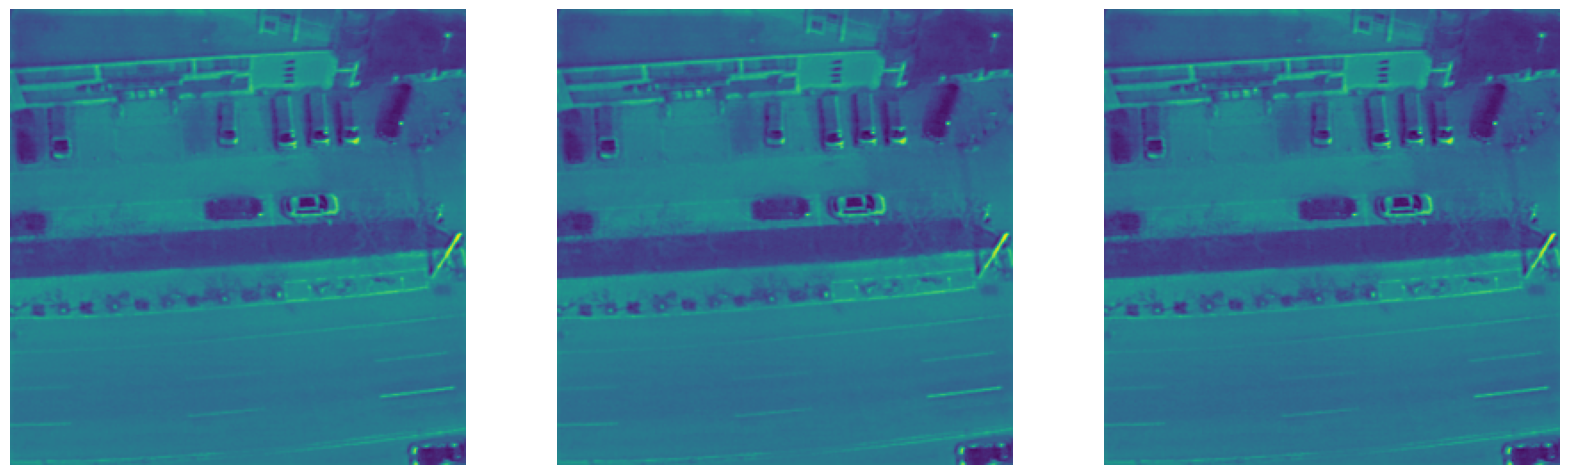

In [44]:
fig = plt.figure(figsize=(20, 20))

for i in range(3):
    fig.add_subplot(1, 3, i + 1)
    plt.axis('off')
    plt.imshow(output[i])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


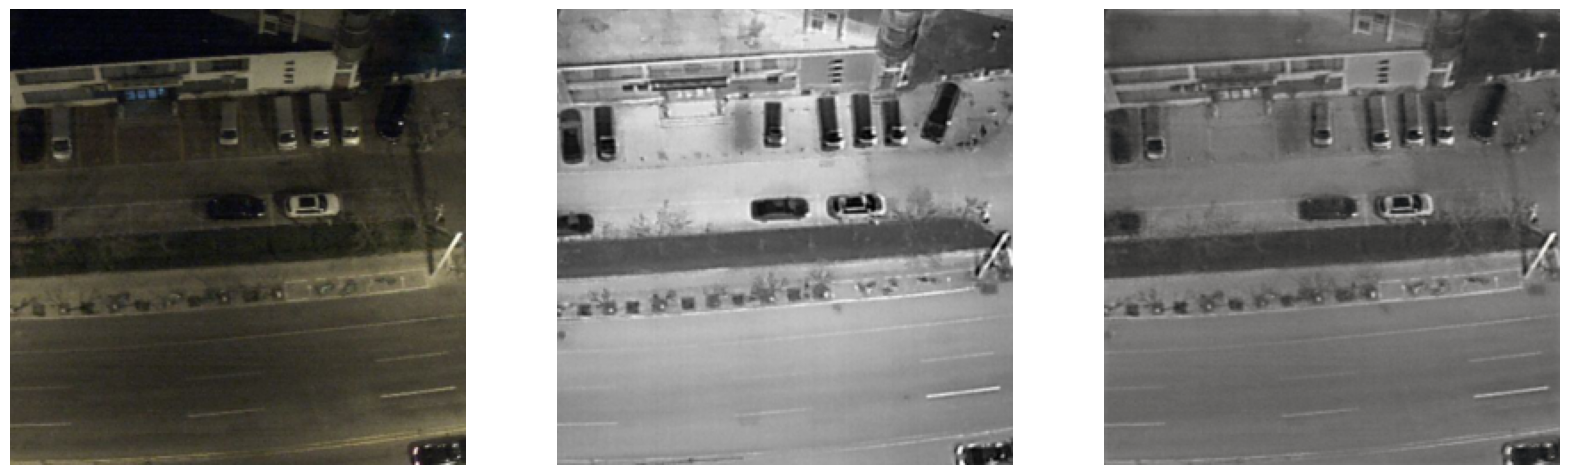

In [45]:
vis_image2 = vis_image.permute(1, 2, 0).numpy()
ir_image2 = ir_image.permute(1, 2, 0).numpy()
output2 = output.permute(1, 2, 0).numpy()

data_images = [vis_image2, ir_image2, output2]

fig = plt.figure(figsize=(20, 20))

for i in range(3):
    fig.add_subplot(1, 3, i + 1)
    plt.axis('off')
    plt.imshow((data_images[i]))

In [46]:
# plt.imshow(output2)